In [1]:
# Pipeline ===>> Container ===> Steps of process continuous flow .
# Output of first step will be input of second step and output of second step will be
# input of third step .

# Column transformer 1o 2 in xxxxx


In [2]:
import numpy as np
import pandas as pd

In [3]:
# Data ===> divide ==>> Categorical data [col1 ,col2 ,col3...]===>
# Numerical data[col1 , col2 , col3...] ===>

# Pipeline for Numerical data ===> data fill if there is any missing values ==>
# Then we will convert it into standardization(mean=0,std = 1)

# Pipeline for Categorical data ===> data fill if there is any missing values ===>
# Then we will Encode it .

#b =  ColumnTransformer['a' , approach_name , column_name]

# Pipeline (output of b ==> model training)

# Model -prediction ===> Accuracy



In [4]:
df = pd.read_csv("/content/covid_toy.csv")
df.head(3)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
X  = df.drop(columns = ['has_covid'])
y = df['has_covid']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
    random_state=42)


In [7]:
# Define the columns that need to be preprocessed
categorical_features = ['gender', 'city']
numeric_features = ['age', 'fever']

In [8]:
# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)


In [9]:
from sklearn.metrics  import  accuracy_score

In [10]:
accuracy_score(y_test , y_pred)

0.65

In [11]:
# Complete Case Analysis ===> Data missing values 5% less ===> drop ===> data perofrmance not effect
# if data missing values more then 5% ===> fill missing data .

In [12]:
df.isnull().mean()*100

,0
age,0.0
gender,0.0
fever,10.0
cough,0.0
city,0.0
has_covid,0.0


In [15]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.20 and df[var].isnull().mean() > 0]
cols

['fever']

In [16]:
df[cols].sample(5)

,fever
47,104.0
56,NaN
74,104.0
26,100.0
96,101.0


In [17]:
len(df[cols].dropna()) / len(df)

0.9

In [18]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((100, 6), (90, 1))

In [19]:
import matplotlib.pyplot as plt

<Axes: >

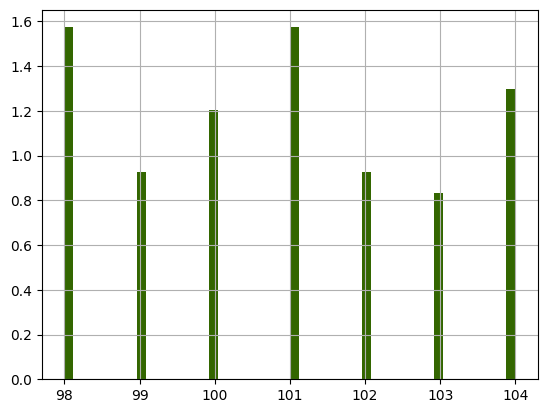

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['fever'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['fever'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

In [24]:
# FunctionTransformer ===>
# data ===>  custom logics ===> FunctionTransformer .

The FunctionTransformer is a tool in scikit-learn, a popular Python library for machine learning, that allows you to apply a specified function to the input data. The FunctionTransformer can be useful for performing custom transformations of input data in a machine learning pipeline.
The FunctionTransformer takes as input a single function that will be applied to each sample in the data. This function can be any Python function that takes a single argument, such as a lambda function or a user-defined function. The function should return the transformed sample.

In [25]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# create a dataset
X = np.array([[1, 2], [3, 4]])

# define the transformation function
log_transform = FunctionTransformer(np.log1p)

# apply the transformation to the dataset
X_transformed = log_transform.transform(X)

# view the transformed data
print(X_transformed)

[[0.69314718 1.09861229]
 [1.38629436 1.60943791]]


In [26]:
# 2. Scaling And Normalization

from sklearn.preprocessing import FunctionTransformer
import numpy as np

# create a dataset
X = np.array([[1, 2], [3, 4]])

# define a custom scaling function
def my_scaling(X):
    return X / np.max(X)

# create a FunctionTransformer to apply the custom function
custom_transformer = FunctionTransformer(my_scaling)

# apply the transformer to the input data
X_transformed = custom_transformer.transform(X)

# view the transformed data
print(X_transformed)


[[0.25 0.5 ]
 [0.75 1.  ]]
